# 📊 **Exploring Respiratory Sound Data for Disease Analysis**

Welcome to this exploratory data analysis (EDA) notebook, where we'll dive deep into the world of respiratory sound data. 🎧💨 Respiratory sounds, such as coughs, wheezes, and crackles, can be indicative of various respiratory conditions. In this notebook, we'll:

- **Load and explore** the dataset to understand its structure and contents. 🗂️
- **Visualize audio waveforms** to get a sense of the sound patterns. 🌊
- **Analyze frequency components** using Mel-frequency cepstral coefficients (MFCCs) and other spectral features. 🎶
- **Study time-domain features** like zero-crossing rates and energy to understand the temporal characteristics of the sounds. ⏱️
- **Compare and contrast** features between healthy and diseased samples. 🩺

By the end of this notebook, you'll have a comprehensive understanding of the respiratory sound data and how various features can be used to distinguish between different respiratory conditions. Let's get started! 🚀


## 📂 **Uploading Your Kaggle API Key**

Before we dive into exploring the respiratory sound dataset, we first need to set up access to Kaggle. 🛠️

To do this, we'll upload the `kaggle.json` file, which contains your Kaggle API credentials. This file is essential for downloading datasets directly from Kaggle into our Colab environment. If you haven't set up your Kaggle API key yet, follow these steps:

1. Go to your Kaggle account settings.
2. Scroll down to the **API** section.
3. Click on **Create New API Token**. This will download the `kaggle.json` file to your computer.

Once you've got the `kaggle.json` file, run the cell below to upload it. 📥

After uploading, we'll be all set to start fetching the data! 🗃️

In [ ]:
from google.colab import files
files.upload()  # Upload kaggle.json
# Import the 'files' module from Google Colab to handle file uploads.
# Call the 'upload' method from the 'files' module to prompt the user to upload the 'kaggle.json' file.
# This file contains the Kaggle API credentials necessary for accessing Kaggle datasets.

## 🔐 **Setting Up Kaggle API Configuration**

Now that we've uploaded the `kaggle.json` file, the next step is to securely configure it within our environment. 🛡️

In this step, we will:

1. **Create a directory** for Kaggle in your home folder if it doesn't already exist. This is where the `kaggle.json` file will be stored. 🗂️
2. **Move** the uploaded `kaggle.json` file into the newly created directory. 🚚
3. **Set permissions** on the file to ensure it's secure. This step restricts access to the file, keeping your API key safe. 🔒
4. **Verify** the contents of the directory to confirm that the `kaggle.json` file is in place with the correct permissions. ✅

By the end of this step, your Kaggle API key will be securely stored and ready to use. Let's run the commands below:

In [2]:
!mkdir -p ~/.kaggle
!mv /content/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls -la ~/.kaggle/
# Create a directory for Kaggle API configuration files in the user's home directory.
# Move the uploaded 'kaggle.json' file to the newly created '.kaggle' directory.
# Set permissions on 'kaggle.json' to read/write for the owner only (600), ensuring the file is secure.
# List the files in the '.kaggle' directory to confirm that 'kaggle.json' is correctly placed and has the proper permissions.

total 16
drwxr-xr-x 2 root root 4096 Aug 20 13:32 .
drwx------ 1 root root 4096 Aug 20 13:32 ..
-rw------- 1 root root   69 Aug 20 13:32 kaggle.json


## 📥 **Downloading the Respiratory Sound Database**

Now that our Kaggle API key is securely configured, we can proceed to download the **Respiratory Sound Database** directly from Kaggle. 📊

This dataset contains a variety of respiratory sounds that we'll analyze in this notebook. By using the Kaggle API, we can seamlessly download the dataset into our Colab environment with a single command.

The command below will:

- **Download** the Respiratory Sound Database from Kaggle. 📂
- Store it in the current working directory of your Colab environment. 🖥️



In [3]:
# Use the Kaggle API command to download the 'Respiratory Sound Database' dataset.
# The dataset will be downloaded as a zip file to the current working directory.
!kaggle datasets download -d vbookshelf/respiratory-sound-database

Dataset URL: https://www.kaggle.com/datasets/vbookshelf/respiratory-sound-database
License(s): unknown
100% 3.69G/3.69G [03:18<00:00, 19.9MB/s]
100% 3.69G/3.69G [03:18<00:00, 20.0MB/s]


## 🗂️ **ICBHI Respiratory Sound Database**

The **Respiratory Sound Database** was originally compiled to support the scientific challenge organized at the International Conference on Biomedical Health Informatics (**ICBHI 2017**). The current version of this database is made freely available for research and includes both the public and private datasets used in the ICBHI challenge.

### **Dataset Overview**

- **Collection**: The dataset contains audio samples collected independently by two research teams in different countries over several years:
  - **Team 1**: School of Health Sciences, University of Aveiro (ESSUA), at the Respiratory Research and Rehabilitation Laboratory (Lab3R), ESSUA, and Hospital Infante D. Pedro, Aveiro, Portugal.
  - **Team 2**: Aristotle University of Thessaloniki (AUTH) and the University of Coimbra (UC), collected at the Papanikolaou General Hospital, Thessaloniki, and the General Hospital of Imathia (Health Unit of Naousa), Greece.

- **Content**:
  - **Total Duration**: 5.5 hours of recordings.
  - **Respiratory Cycles**: 6898 cycles, including:
    - **Crackles**: 1864 cycles.
    - **Wheezes**: 886 cycles.
    - **Both Crackles and Wheezes**: 506 cycles.
  - **Annotated Audio Samples**: 920 samples from 126 subjects.

### **Annotation and Recording Details**

- **Annotation**: The respiratory cycles were annotated by respiratory experts, classifying each cycle as including:
  - Crackles.
  - Wheezes.
  - A combination of crackles and wheezes.
  - No adventitious respiratory sounds.
  
- **Recording Details**:
  - **Equipment**: Heterogeneous recording equipment was used.
  - **Duration**: Each recording ranges from 10 to 90 seconds.
  - **Chest Locations**: The dataset provides the chest locations from which the recordings were acquired.
  - **Noise Levels**: Some recordings include high noise levels to simulate real-life conditions.

### **File Naming Conventions**

Each file name is structured with 5 elements, separated by underscores (`_`):

1. **Patient number**: (e.g., 101, 102, ..., 226)
2. **Recording index**
3. **Chest location**:
    - Trachea (Tc)
    - Anterior left (Al)
    - Anterior right (Ar)
    - Posterior left (Pl)
    - Posterior right (Pr)
    - Lateral left (Ll)
    - Lateral right (Lr)
4. **Acquisition mode**:
    - Sequential/single channel (sc)
    - Simultaneous/multichannel (mc)
5. **Recording equipment**:
    - AKG C417L Microphone (AKGC417L)
    - 3M Littmann Classic II SE Stethoscope (LittC2SE)
    - 3M Littmann 3200 Electronic Stethoscope (Litt3200)
    - WelchAllyn Meditron Master Elite Electronic Stethoscope (Meditron)

### **Annotation Files**

The annotation files consist of four columns:

1. Beginning of respiratory cycle(s).
2. End of respiratory cycle(s).
3. Presence/absence of crackles (1 for presence, 0 for absence).
4. Presence/absence of wheezes (1 for presence, 0 for absence).

### **Diagnosis and Demographic Information**

- **Diagnosis**: The diagnosis for each subject is provided, including conditions such as:
  - **COPD**: Chronic Obstructive Pulmonary Disease
  - **LRTI**: Lower Respiratory Tract Infection
  - **URTI**: Upper Respiratory Tract Infection
- **Demographics**: The demographic information includes the following variables (NA: Not Available):
  - Participant ID
  - Age
  - Sex
  - Adult BMI (kg/m²)
  - Child Weight (kg)
  - Child Height (cm)

### **Access and Availability**

This database is freely available for research purposes and can be downloaded in ZIP format. Additionally, files containing demographic information and detailed event annotations are also available.

- **Dataset Link**: [ICBHI Respiratory Sound Database on Kaggle](https://www.kaggle.com/datasets/vbookshelf/respiratory-sound-database) 📎



## 🗂️ **Extracting the Respiratory Sound Database**

Now that we've successfully downloaded the Respiratory Sound Database, the next step is to extract the contents of the zip file. 📦

The command below will:

- **Unzip** the downloaded file, making the dataset's contents accessible in your Colab environment. 🗃️
- **Extract** the files into the current working directory, so we can begin working with the data right away. 🛠️

In [4]:
!unzip /content/respiratory-sound-database.zip

Archive:  /content/respiratory-sound-database.zip
  inflating: Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/101_1b1_Al_sc_Meditron.txt  
  inflating: Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/101_1b1_Al_sc_Meditron.wav  
  inflating: Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/101_1b1_Pr_sc_Meditron.txt  
  inflating: Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/101_1b1_Pr_sc_Meditron.wav  
  inflating: Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/102_1b1_Ar_sc_Meditron.txt  
  inflating: Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/102_1b1_Ar_sc_Meditron.wav  
  inflating: Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/103_2b2_Ar_mc_LittC2SE.txt  
  inflating: Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/103_2b2_Ar_mc_LittC2SE.wav  
  inflating: Respirato

## 📁 **Exploring the Dataset Structure**

With the Respiratory Sound Database extracted, it's time to take a look at the files and directories we've just unpacked. Understanding the structure of the dataset is crucial before diving into analysis. 🧐

We'll start by listing the contents of the main directory to see what files and folders are available. Then, we'll take a closer look at the `audio_and_txt_files` directory, where the core data—audio recordings and their corresponding annotations—are stored. 🎧📝

In [5]:
!ls /content/respiratory_sound_database/Respiratory_Sound_Database
!ls /content/respiratory_sound_database/Respiratory_Sound_Database/audio_and_txt_files

audio_and_txt_files  filename_differences.txt  filename_format.txt  patient_diagnosis.csv
101_1b1_Al_sc_Meditron.txt  150_1b2_Al_sc_Meditron.txt	178_1b2_Tc_mc_AKGC417L.txt
101_1b1_Al_sc_Meditron.wav  150_1b2_Al_sc_Meditron.wav	178_1b2_Tc_mc_AKGC417L.wav
101_1b1_Pr_sc_Meditron.txt  151_2p2_Al_mc_AKGC417L.txt	178_1b3_Al_mc_AKGC417L.txt
101_1b1_Pr_sc_Meditron.wav  151_2p2_Al_mc_AKGC417L.wav	178_1b3_Al_mc_AKGC417L.wav
102_1b1_Ar_sc_Meditron.txt  151_2p2_Ar_mc_AKGC417L.txt	178_1b3_Ar_mc_AKGC417L.txt
102_1b1_Ar_sc_Meditron.wav  151_2p2_Ar_mc_AKGC417L.wav	178_1b3_Ar_mc_AKGC417L.wav
103_2b2_Ar_mc_LittC2SE.txt  151_2p2_Ll_mc_AKGC417L.txt	178_1b3_Lr_mc_AKGC417L.txt
103_2b2_Ar_mc_LittC2SE.wav  151_2p2_Ll_mc_AKGC417L.wav	178_1b3_Lr_mc_AKGC417L.wav
104_1b1_Al_sc_Litt3200.txt  151_2p2_Lr_mc_AKGC417L.txt	178_1b3_Pl_mc_AKGC417L.txt
104_1b1_Al_sc_Litt3200.wav  151_2p2_Lr_mc_AKGC417L.wav	178_1b3_Pl_mc_AKGC417L.wav
104_1b1_Ar_sc_Litt3200.txt  151_2p2_Pl_mc_AKGC417L.txt	178_1b3_Pr_mc_AKGC417L.txt
104_1b1_

## 🔢 **Counting the Audio and Annotation Files**

Before we dive into analyzing the data, let's get a sense of the volume of data we're working with. Specifically, we'll count the number of:

- **Text files (`*.txt`)**: These files contain annotations and metadata corresponding to the audio recordings. 📝
- **Audio files (`*.wav`)**: These files are the actual respiratory sound recordings we'll analyze. 🎧

By counting these files, we can gauge the dataset's size and ensure everything is in place for our analysis.

In [6]:
# Count the number of text files (*.txt) in the 'audio_and_txt_files' directory.
# Use 'wc -l' to count the lines of output from the 'ls' command, which corresponds to the number of text files.
# Count the number of audio files (*.wav) in the 'audio_and_txt_files' directory.
# Use 'wc -l' to count the lines of output from the 'ls' command, which corresponds to the number of audio files.
!ls /content/respiratory_sound_database/Respiratory_Sound_Database/audio_and_txt_files/*.txt | wc -l
!ls /content/respiratory_sound_database/Respiratory_Sound_Database/audio_and_txt_files/*.wav | wc -l

920
920


## 📚 **Importing Necessary Libraries**

Before we dive into our data analysis, we need to import several libraries that will help us throughout this notebook. These libraries provide essential functions for data manipulation, visualization, and handling files. Here’s a brief overview of each:

- **`random`**: Used for generating random numbers and making random selections. 🌀
- **`glob`**: Helps in finding files that match specific patterns, useful for locating dataset files. 🔍
- **`pandas`**: Essential for data manipulation and analysis, allowing us to work with DataFrames and perform various data operations. 📊
- **`matplotlib.pyplot`**: Provides plotting functions to create visualizations and graphs to aid in data exploration and presentation. 📈
- **`csv`**: Facilitates reading from and writing to CSV files, commonly used for handling tabular data. 📑
- **`wave`**: Used for reading and writing WAV audio files, which is crucial for handling audio data. 🎵
- **`IPython.display`**: Useful for displaying rich media, such as audio files, directly within notebooks. 🎧
- **`librosa`**: A powerful library for analyzing and processing audio data, including functions for loading, visualizing, and transforming sound files. 🎶

In [153]:
import random
import glob
import pandas as pd
import matplotlib.pyplot as plt
import csv
import wave
import IPython.display as ipd
import librosa
from librosa import feature

## 📂 **Viewing a Sample Annotation File**
Understanding the structure of annotation files is crucial for ensuring proper data processing and analysis. This step involves:
1. **Define the Header**: Specify the columns for the annotation files.
2. **Get a List of Text Files**: Locate all annotation files in the dataset directory.
3. **Choose a Random File**: Select a random annotation file for examination.
4. **Display the Content**: Print the contents of the selected file to understand its structure.

In [9]:
# Get a list of all text files
# Define the header for the annotation files
header = ["Beginning of Respiratory Cycle", "End of Respiratory Cycle", "Presence/Absence of Crackles", "Presence/Absence of Wheezes"]
text_files = glob.glob('/content/respiratory_sound_database/Respiratory_Sound_Database/audio_and_txt_files/*.txt')
# Choose a random file
random_file = random.choice(text_files)
print(header)
# Print the contents of the file
with open(random_file, 'r') as f:
  print(f.read())

['Beginning of Respiratory Cycle', 'End of Respiratory Cycle', 'Presence/Absence of Crackles', 'Presence/Absence of Wheezes']
1.377	4.249	1	0
4.249	7.387	1	0
7.387	10.175	1	0
10.175	12.897	0	0
12.897	15.634	0	0
15.634	18.84	0	1



## 📊 **Loading and Viewing Patient Diagnosis Data**

To analyze the dataset effectively, we need to load and examine the patient diagnosis data. This step involves:

### **Loading the CSV File**

The CSV file `patient_diagnosis.csv` contains crucial information about patient diagnoses. We load this file into a Pandas DataFrame without an initial header, as the file might not include column names.

In [57]:
# Assuming the CSV file is named 'data.csv'
header = ['Patient number', 'Diagnosis']
df = pd.read_csv('/content/respiratory_sound_database/Respiratory_Sound_Database/patient_diagnosis.csv', names=header)

# Print the first few rows of the DataFrame
df.head()

,Patient number,Diagnosis
0,101,URTI
1,102,Healthy
2,103,Asthma
3,104,COPD
4,105,URTI


In [12]:
# The df.info() function provides a concise summary of the DataFrame, including:
# - Number of Entries: Total rows in the DataFrame.
# - Column Names: The names of all columns.
# - Data Types: The type of data in each column (e.g., integer, float, object).
# - Non-Null Count: Number of non-null entries per column.
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Patient_number  126 non-null    int64 
 1   Diagnosis       126 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.1+ KB
None


In [13]:
# The df.describe() function computes and displays descriptive statistics for numerical columns, including:
# - Count: Number of non-null entries.
# - Mean: Average value.
# - Standard Deviation: Measure of the spread of the data.
# - Minimum: Smallest value.
# - 25th, 50th, and 75th Percentiles: Quantiles that indicate the distribution.
# - Maximum: Largest value.
print(df.describe())

       Patient_number
count      126.000000
mean       163.500000
std         36.517119
min        101.000000
25%        132.250000
50%        163.500000
75%        194.750000
max        226.000000


In [14]:
# The df.isnull().sum() function checks each column for missing values and provides:
# - A count of missing (null) entries per column.
# This helps identify where data cleaning may be necessary due to the presence of missing values.
print(df.isnull().sum())

Patient_number    0
Diagnosis         0
dtype: int64


In [15]:
# The df.nunique() function calculates the number of unique values in each column, showing:
# - The total number of distinct values in each column.
# This helps us understand the variability and uniqueness of the data, which can be useful for identifying categorical variables and assessing data quality.
print(df.nunique())

Patient_number    126
Diagnosis           8
dtype: int64


In [17]:
# The df['Diagnosis'].value_counts() function counts the number of occurrences of each unique value in the column with index 1, which typically represents the disease labels in the DataFrame.
# This provides the distribution of different diseases in the dataset.
disease_counts = df['Diagnosis'].value_counts()
print(disease_counts)

Diagnosis
COPD              64
Healthy           26
URTI              14
Bronchiectasis     7
Pneumonia          6
Bronchiolitis      6
LRTI               2
Asthma             1
Name: count, dtype: int64


In [19]:
# Calculate class distribution
# The df['Diagnosis'].value_counts(normalize=True) function calculates the relative frequency (proportion) of each unique value in column index 1,
# which typically represents the disease labels. Multiplying by 100 converts these proportions to percentages.
class_distribution = df['Diagnosis'].value_counts(normalize=True) * 100

# Print class distribution
# This prints the percentage distribution of each class in the dataset, allowing us to see the proportion of each disease.
print(class_distribution)

# Determine if dataset is balanced or imbalanced
# Define a threshold for imbalance. If the difference between the maximum and minimum class percentages exceeds this threshold, the dataset is considered imbalanced.
imbalance_threshold = 10  # Set a threshold for imbalance (adjust as needed)

# Compare the range of class distributions against the imbalance threshold
if class_distribution.max() - class_distribution.min() > imbalance_threshold:
  print("The dataset is imbalanced.")
else:
  print("The dataset is relatively balanced.")


Diagnosis
COPD              50.793651
Healthy           20.634921
URTI              11.111111
Bronchiectasis     5.555556
Pneumonia          4.761905
Bronchiolitis      4.761905
LRTI               1.587302
Asthma             0.793651
Name: proportion, dtype: float64
The dataset is imbalanced.


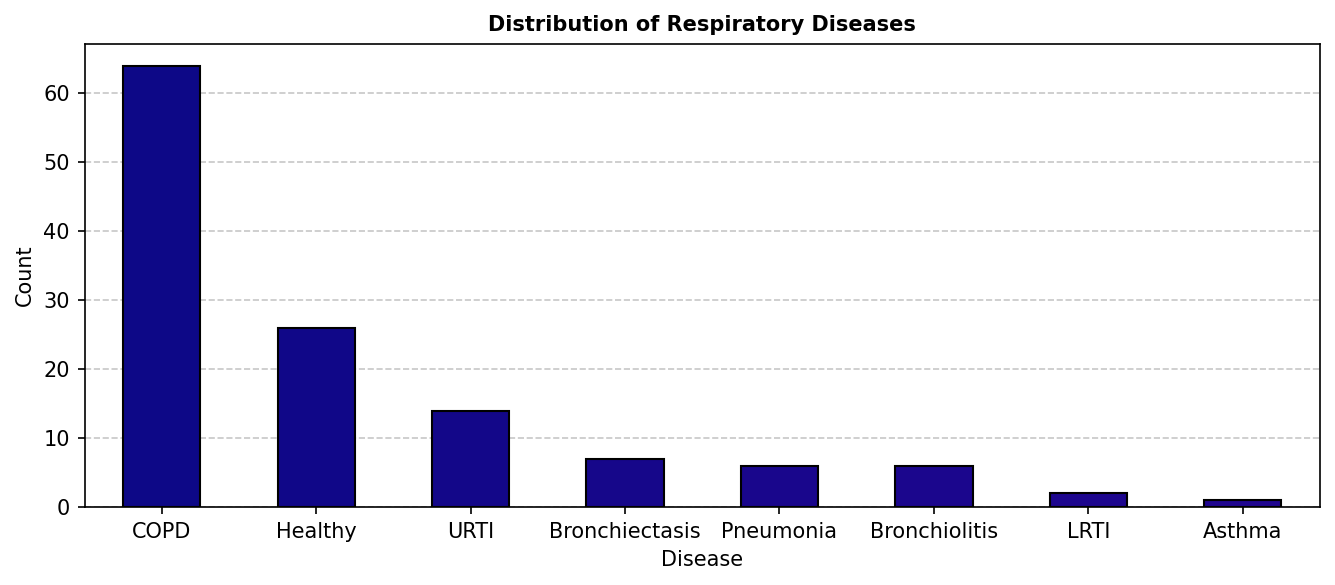

In [53]:
# Count the number of each disease
disease_counts = df['Diagnosis'].value_counts()

# Create a bar plot with improved aesthetics
plt.figure(figsize=(9, 4), dpi=150)  # Increase figure size and resolution

# Use a color palette for better visual appeal
colors = plt.get_cmap('plasma').colors

# Plot a bar chart with specified colors and edge color
disease_counts.plot(kind='bar', color=colors, edgecolor='black', zorder=3)

# Add grid lines for easier readability, ensuring they are in the background
plt.grid(axis='y', linestyle='--', alpha=0.7, zorder=0)

# Set the title and labels with improved fonts
plt.title('Distribution of Respiratory Diseases', fontsize=10, weight='bold')
plt.xlabel('Disease', fontsize=10)
plt.ylabel('Count', fontsize=10)

# Rotate x-axis labels for better readability
plt.xticks(rotation=0, ha='center', fontsize=10)

# Adjust layout to ensure everything fits well
plt.tight_layout()

# Display the plot
plt.show()


## 🗂️ **Checking the Demographic File**

In this step, we will examine the demographic information file, which contains details about the patients. The file has the following six columns:

- **Patient Number**: Unique identifier for each patient.
- **Age**: Age of the patient.
- **Sex**: Gender of the patient.
- **Adult BMI (kg/m2)**: Body Mass Index for adults, measured in kg/m².
- **Child Weight (kg)**: Weight of the child, measured in kg.
- **Child Height (cm)**: Height of the child, measured in cm.

### 📂 **Reading the Demographic File**

We start by reading the content of the demographic file named `demographic_info.txt`, located in the specified directory. This file is read line by line.

In [35]:
# prompt: i want to check  the demographic file, The demographic info file has 6 columns:
#   - Patient number
#   - Age
#   - Sex
#   - Adult BMI (kg/m2)
#   - Child Weight (kg)
#   - Child Height (cm)

# Assuming the demographic file is named 'demographic_info.txt'
demographic_file = '/content/respiratory_sound_database/Respiratory_Sound_Database/demographic_info.txt'

# Read the demographic file
with open(demographic_file, 'r') as f:
  demographic_data = f.readlines()

# Print the first few lines of the demographic data
print(demographic_data[:5])

# You can further process and analyze the demographic data as needed,
# such as extracting specific columns, calculating statistics, etc.


['\n', '101 3 F NA 19 99\n', '102 0.75 F NA 9.8 73\n', '103 70 F 33 NA NA\n', '104 70 F 28.47 NA NA\n']


## 📊 **Loading Demographic Data into a DataFrame**

In this step, we will load the demographic data into a pandas DataFrame. This allows for easier manipulation and analysis of the data using the powerful features provided by pandas.

### 🗂️ **Defining the Header**

We start by defining the header for the DataFrame. This header corresponds to the columns in the demographic data file:

- **Patient Number**: Unique identifier for each patient.
- **Age**: Age of the patient.
- **Sex**: Gender of the patient.
- **Adult BMI (kg/m2)**: Body Mass Index for adults, measured in kg/m².
- **Child Weight (kg)**: Weight of the child, measured in kg.
- **Child Height (cm)**: Height of the child, measured in cm.

### 📂 **Reading the Data into a DataFrame**
We read the demographic file into a pandas DataFrame using the defined header. We specify delimiter='\s+' to handle any amount of whitespace between columns, ensuring proper separation of data.

In [36]:
# Define the header
header = ["Patient number", "Age", "Sex", "Adult BMI (kg/m2)", "Child Weight (kg)", "Child Height (cm)"]

# Read the demographic file into a pandas DataFrame
df_demographic = pd.read_csv(demographic_file, delimiter='\s+', names=header)

# Print the DataFrame
df_demographic

,Patient number,Age,Sex,Adult BMI (kg/m2),Child Weight (kg),Child Height (cm)
0,101,3.00,F,NaN,19.0,99.0
1,102,0.75,F,NaN,9.8,73.0
2,103,70.00,F,33.00,NaN,NaN
3,104,70.00,F,28.47,NaN,NaN
4,105,7.00,F,NaN,32.0,135.0
...,...,...,...,...,...,...
121,222,60.00,M,NaN,NaN,NaN
122,223,NaN,NaN,NaN,NaN,NaN
123,224,10.00,F,NaN,32.3,143.0
124,225,0.83,M,NaN,7.8,74.0


In [37]:
# Display basic information about the DataFrame
print(df_demographic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Patient number     126 non-null    int64  
 1   Age                125 non-null    float64
 2   Sex                125 non-null    object 
 3   Adult BMI (kg/m2)  75 non-null     float64
 4   Child Weight (kg)  44 non-null     float64
 5   Child Height (cm)  42 non-null     float64
dtypes: float64(4), int64(1), object(1)
memory usage: 6.0+ KB
None


In [38]:
# Display descriptive statistics of the DataFrame
print(df_demographic.describe())

       Patient number        Age  Adult BMI (kg/m2)  Child Weight (kg)  \
count      126.000000  125.00000          75.000000          44.000000   
mean       163.500000   42.99264          27.190000          21.361136   
std         36.517119   32.20907           5.372519          17.150885   
min        101.000000    0.25000          16.500000           7.140000   
25%        132.250000    4.00000          24.150000          11.755000   
50%        163.500000   60.00000          27.400000          15.100000   
75%        194.750000   71.00000          29.185000          24.325000   
max        226.000000   93.00000          53.500000          80.000000   

       Child Height (cm)  
count          42.000000  
mean          104.652381  
std            30.793128  
min            64.000000  
25%            81.250000  
50%            99.500000  
75%           117.750000  
max           183.000000  


In [39]:
# Check for missing values
print(df_demographic.isnull().sum())

Patient number        0
Age                   1
Sex                   1
Adult BMI (kg/m2)    51
Child Weight (kg)    82
Child Height (cm)    84
dtype: int64


In [40]:
# Display the number of unique values in each column
print(df_demographic.nunique())

Patient number       126
Age                   51
Sex                    2
Adult BMI (kg/m2)     66
Child Weight (kg)     38
Child Height (cm)     32
dtype: int64


## 📊 **Visualizing Demographic Data**

In this step, we will create plots for each column in the demographic data, except for the 'Patient number' column. This helps us understand the distribution and characteristics of each variable in the dataset.

### **Plotting Categorical Columns**

For categorical columns, such as 'Sex', we will create bar plots to visualize the distribution of each category. Bar plots are useful for showing the frequency of each category in the dataset.

### **Plotting Numerical Columns**
For numerical columns, such as 'Age', 'Adult BMI (kg/m2)', 'Child Weight (kg)', and 'Child Height (cm)', we will create histograms. Histograms show the frequency distribution of numerical data and are useful for identifying patterns, such as skewness or the presence of outliers.

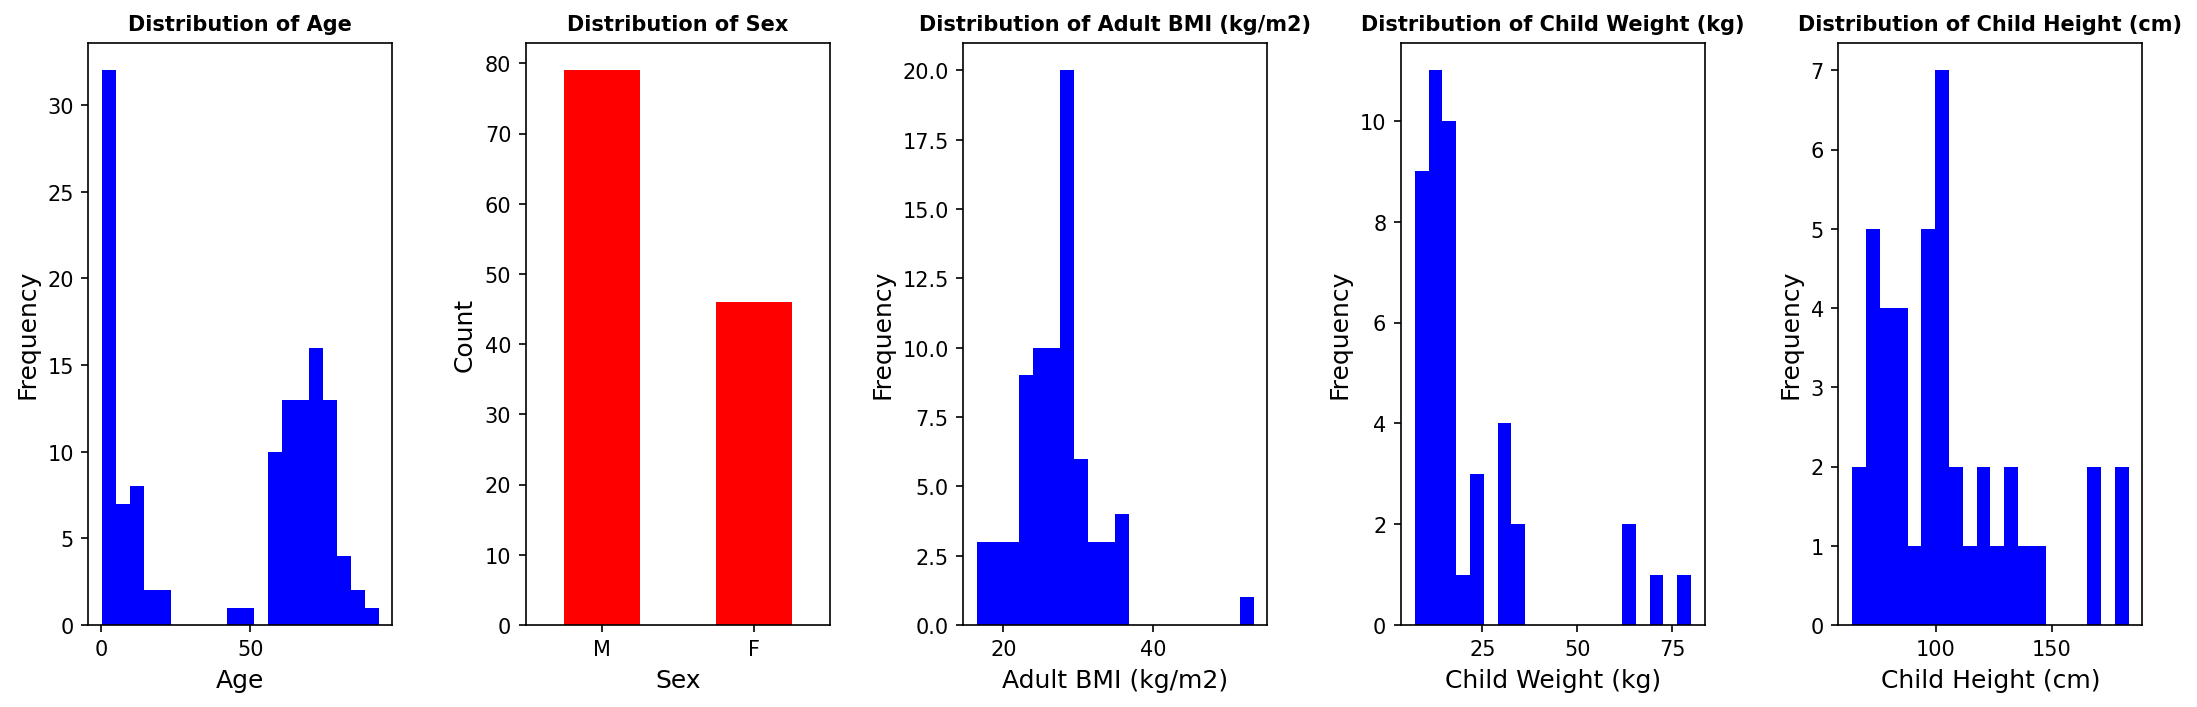

In [55]:
# Define the number of columns for the grid
n_cols = 5

# Define the number of rows needed
n_rows = 1

# Create a figure and axes for the grid of plots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15,5), dpi = 150)
fig.tight_layout(pad=3.0)  # Adjust spacing between plots

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over columns (excluding 'Patient number') and create plots
for idx, column in enumerate(df_demographic.columns[1:]):
    ax = axes[idx]
    if df_demographic[column].dtype == 'object':
        # Categorical column: Create a bar plot
        df_demographic[column].value_counts().plot(kind='bar', ax=ax, color='red')
        ax.set_title(f'Distribution of {column}', fontsize=10, weight='bold')
        ax.set_xlabel(column, fontsize=12)
        ax.set_ylabel('Count', fontsize=12)
        ax.tick_params(axis='x', rotation=0)
    else:
        # Numerical column: Create a histogram
        ax.hist(df_demographic[column], color='blue', bins=20)
        ax.set_title(f'Distribution of {column}', fontsize=10, weight='bold')
        ax.set_xlabel(column, fontsize=12)
        ax.set_ylabel('Frequency', fontsize=12)

# Hide any remaining empty subplots
for i in range(len(df_demographic.columns) - 1, len(axes)):
    axes[i].axis('off')

plt.show()

## 🔗 **Merging Demographic and Diagnosis Data**

To perform a thorough analysis of the respiratory sound dataset, it is crucial to integrate the demographic information with the patient diagnosis data. Here’s why this step is essential:

### 🧩 **Why Merge Demographic and Diagnosis Data?**

In the initial state, we have two separate DataFrames:

1. **Demographic Data (`df_demographic`)**:
   - Contains individual patient details such as patient number, age, sex, BMI, child weight, and height.
   
2. **Diagnosis Data (`df`)**:
   - Includes the diagnosis information for each patient, specifically their health condition (e.g., COPD, URTI, LRTI) and their associated patient number.

Since these datasets are separate, each one provides only partial information about the patients. To gain a complete understanding of each patient's health status in relation to their demographic attributes, we need to combine these datasets.

### 🛠️ **Steps to Merge DataFrames**

1. **Combining the DataFrames**: We merge `df_demographic` with `df` based on the common column 'Patient number'. This operation aligns each patient’s demographic details with their corresponding diagnosis information.
2. **Cleaning the Merged DataFrame**: After merging, we remove the redundant column (column 0 from df) and rename the diagnosis column to make it clearer.

In [61]:
# Assuming 'df' is the DataFrame containing patient diagnosis and
# 'df_demographic' is the DataFrame containing demographic information.

# Merge the two DataFrames on 'Patient number'
merged_df = pd.merge(df_demographic, df, left_on='Patient number', right_on='Patient number', how='left')

# Rename column 1 to 'Diagnosis' for clarity
merged_df = merged_df.rename(columns={1: 'Diagnosis'})

# Display the merged DataFrame
merged_df


,Patient number,Age,Sex,Adult BMI (kg/m2),Child Weight (kg),Child Height (cm),Diagnosis
0,101,3.00,F,NaN,19.0,99.0,URTI
1,102,0.75,F,NaN,9.8,73.0,Healthy
2,103,70.00,F,33.00,NaN,NaN,Asthma
3,104,70.00,F,28.47,NaN,NaN,COPD
4,105,7.00,F,NaN,32.0,135.0,URTI
...,...,...,...,...,...,...,...
121,222,60.00,M,NaN,NaN,NaN,COPD
122,223,NaN,NaN,NaN,NaN,NaN,COPD
123,224,10.00,F,NaN,32.3,143.0,Healthy
124,225,0.83,M,NaN,7.8,74.0,Healthy


## 📊 **Understanding Correlations in Data**

In data analysis, understanding correlations between variables is essential for uncovering relationships that may not be immediately apparent. Correlation plots help us visualize and quantify these relationships, providing valuable insights into the data.

### 🔍 **Why Correlation Plots Are Important**

Correlation plots are useful because they allow us to:

1. **Identify Relationships**: They help us identify if and how variables are related to each other. For instance, in a medical dataset, understanding if age correlates with specific diagnoses can reveal important trends.
2. **Guide Hypothesis Formation**: By visualizing correlations, we can generate hypotheses about the data. For example, if older patients tend to have a certain diagnosis more frequently, it might suggest a need for further investigation into age-related risk factors.
3. **Improve Data Understanding**: Correlation plots provide a clearer understanding of how variables interact, which is crucial for effective modeling and decision-making.

### 📊 **Scatter Plot of Age vs. Diagnosis**

In this analysis, we create a scatter plot to explore the relationship between age and diagnosis. This is just one example of how we can use correlation plots. Here’s why we chose this example and how it fits into our broader analysis:

1. **Example Focus**: By examining the correlation between age and diagnosis, we aim to see if age has any influence on the type of respiratory condition diagnosed. This can help us identify patterns or trends in the dataset.
   
2. **Broad Applicability**: While age vs. diagnosis is our current focus, correlation plots can be applied to any pair of variables in the dataset. For instance:
   - **BMI vs. Diagnosis**: To see if BMI influences the likelihood of a particular diagnosis.
   - **Child Weight vs. Diagnosis**: To explore if there’s any relation between a child's weight and the type of respiratory condition.

3. **Future Benefits**: Understanding these correlations can help in:
   - **Feature Selection**: Identifying which features are most relevant for predictive models.
   - **Data Insights**: Gaining insights into the factors that contribute to different diagnoses, leading to more targeted research or interventions.

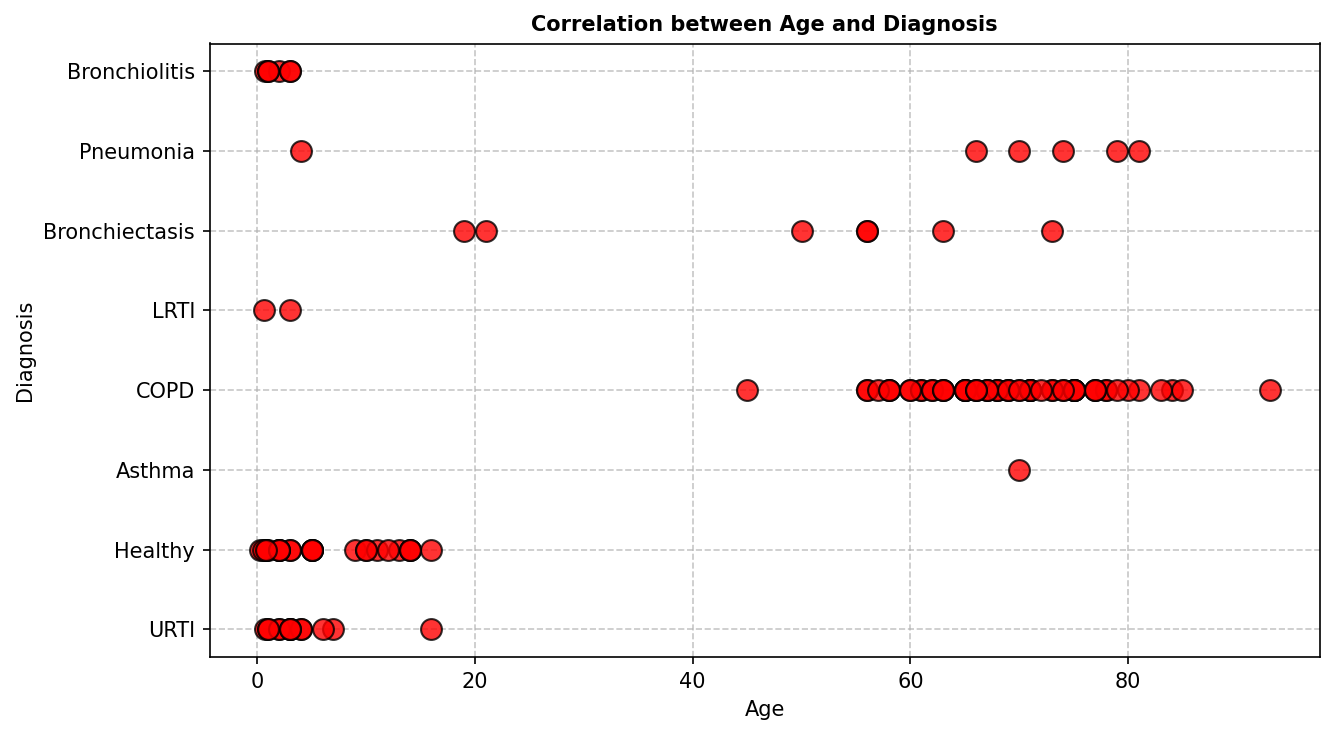

In [72]:
# Extract age and diagnosis columns
age = merged_df['Age']
diagnosis = merged_df['Diagnosis']

# Create scatter plot with improved aesthetics
plt.figure(figsize=(9, 5),dpi=150)
plt.scatter(age, diagnosis, alpha=0.8, c='red', edgecolors='k', s=100,zorder=3)
plt.xlabel('Age', fontsize=10)
plt.ylabel('Diagnosis', fontsize=10)
plt.xticks(rotation=0, ha='center', fontsize=10)
plt.yticks(fontsize=10)

# Enhance plot with titles and labels
plt.title('Correlation between Age and Diagnosis', fontsize=10, fontweight='bold')
plt.xlabel('Age', fontsize=10)
plt.ylabel('Diagnosis', fontsize=10)
plt.xticks(rotation=0, ha='center', fontsize=10)
plt.yticks(fontsize=10)

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7, zorder=0)

# Adjust layout to prevent labels from overlapping
plt.tight_layout()

# Show the plot
plt.show()

## 📋 Health Status Classification and Age Correlation

To better understand the relationship between age and health status, we categorize the diagnoses into two classes: **Healthy** and **Unhealthy**.

In this analysis:
- **Healthy**: Diagnoses classified as 'Healthy'.
- **Unhealthy**: All other diagnoses (e.g., COPD, LRTI, URTI) are categorized as 'Unhealthy'.

We then plot a scatter plot to visualize how these health status categories correlate with the age of the patients. This plot helps us see if there is any apparent trend or relationship between a patient’s age and their health status.

### Scatter Plot: Age vs. Health Status

The scatter plot displays:
- **X-Axis**: Age of the patients.
- **Y-Axis**: Health Status (coded as `0` for Healthy and `1` for Unhealthy).

The plot uses distinct colors to differentiate between the two health statuses, making it easier to see any patterns or trends in the data. The goal is to identify any potential correlations that might indicate if age plays a role in the likelihood of being classified as healthy or unhealthy.

**Note**: Observing these correlations can provide valuable insights for understanding the health status distribution across different age groups and might help in identifying age-related trends in respiratory conditions.


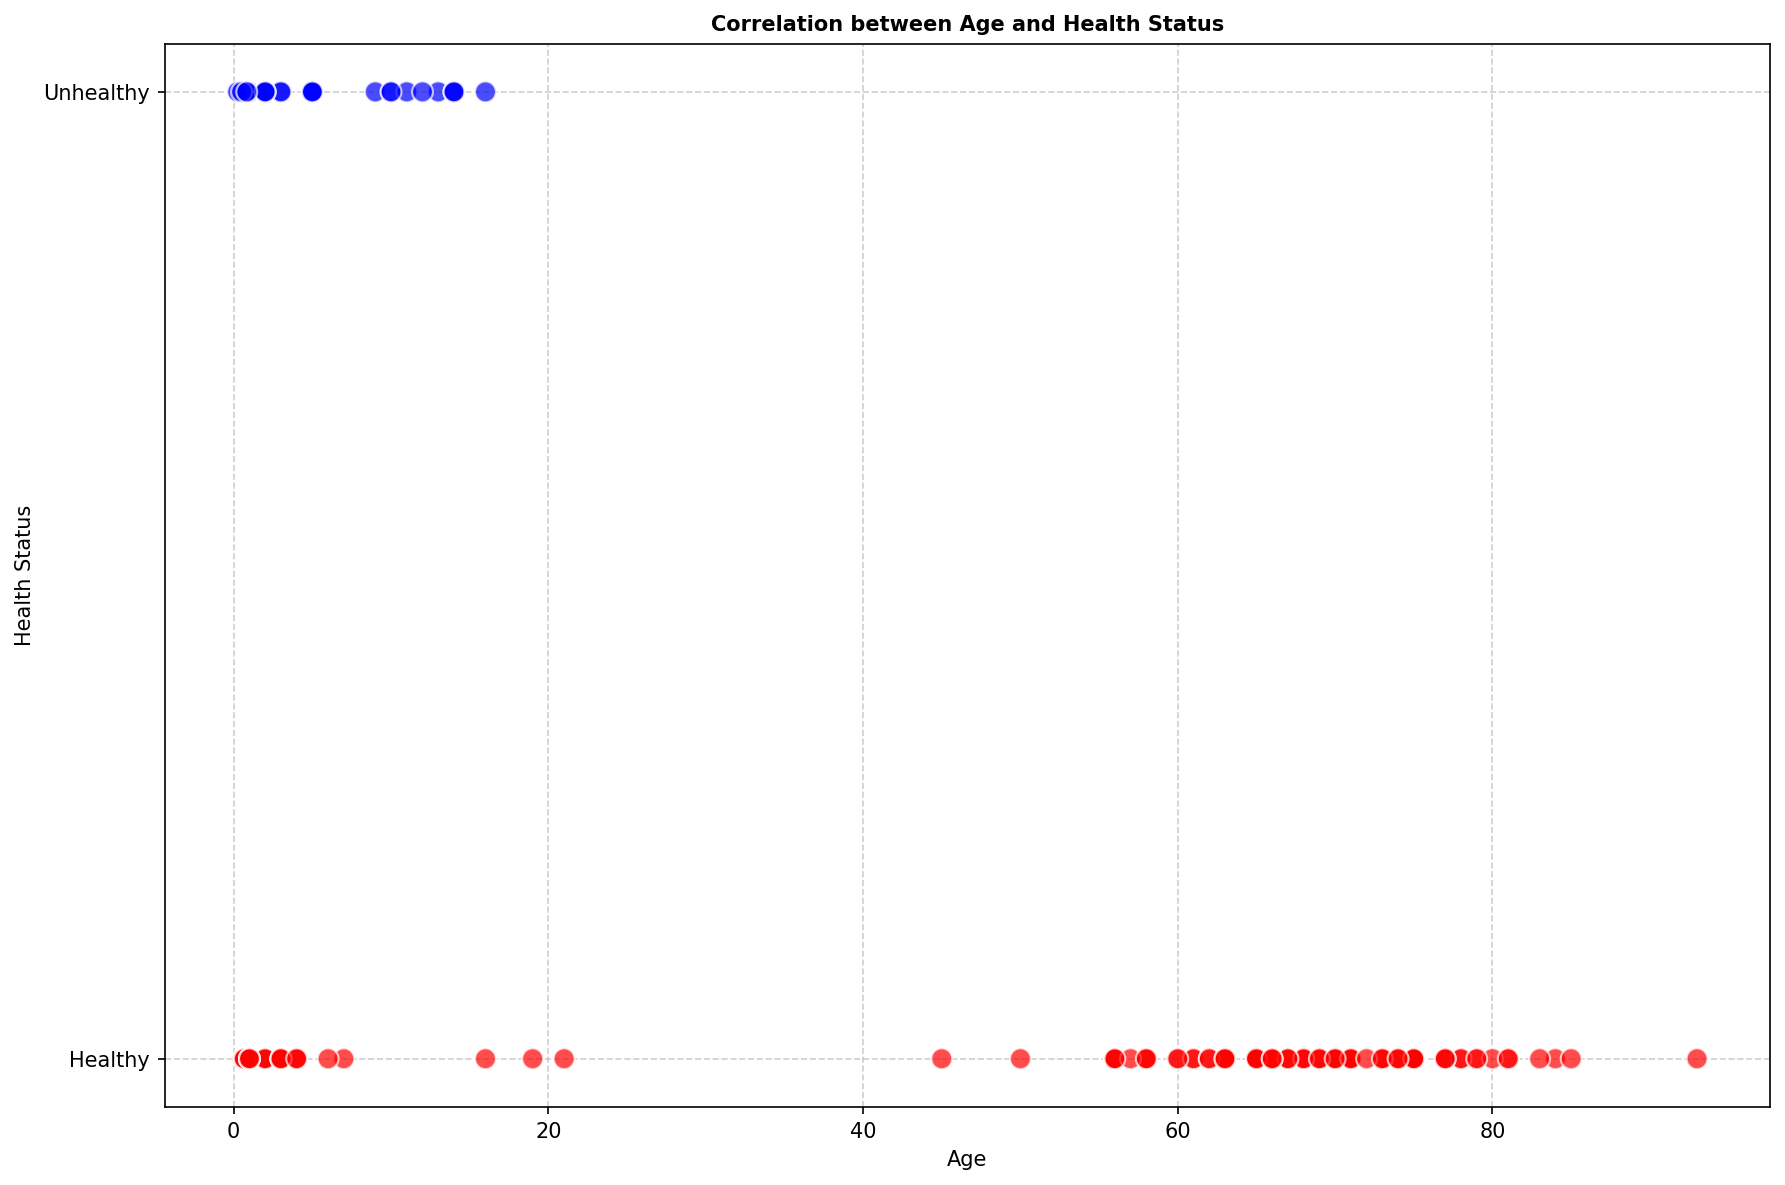

In [75]:
# Create a new column 'Health Status' based on 'Diagnosis'
merged_df['Health Status'] = merged_df['Diagnosis'].apply(lambda x: 'Unhealthy' if x != 'Healthy' else 'Healthy')

# Extract age and health status columns
age = merged_df['Age']
health_status = merged_df['Health Status']

# Create scatter plot
plt.figure(figsize=(12, 8),dpi=150)
colors = {'Healthy':'blue', 'Unhealthy':'red'}  # Define colors for categories
plt.scatter(age, health_status.map(colors), c=health_status.map(colors), alpha=0.7, edgecolors='w', s=100,zorder=3)
plt.title('Correlation between Age and Health Status', fontsize=10, fontweight='bold')
plt.xlabel('Age', fontsize=10)
plt.ylabel('Health Status', fontsize=10)
plt.yticks(ticks=[0, 1], labels=['Healthy', 'Unhealthy'])
plt.xticks(rotation=0, ha='center', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6, zorder=0)
plt.tight_layout()
plt.show()


##  🔊 **Extracting and Saving Audio File Information**

In this step, we extract essential metadata from each `.wav` file in the dataset and compile this information into a CSV file. This process helps in understanding the characteristics of the audio files used in our analysis.

### **Metadata Extracted**:

- **Filename**: The name of the audio file.
- **NumChannels**: Number of audio channels (e.g., mono or stereo).
- **SampleWidth**: The sample width (in bytes) of the audio file.
- **FrameRate**: The sampling rate (number of samples per second).
- **NumFrames**: Total number of audio frames.
- **CompType**: Compression type used for the audio file.
- **CompName**: Name of the compression type.

### **Why This is Important**:

By compiling this metadata, we gain insights into the technical properties of the audio files, which is crucial for tasks such as audio preprocessing, quality control, and ensuring consistency across the dataset. This information will help us make informed decisions during the analysis and modeling phases.

### **Output**:

The metadata is saved into a CSV file named `audio_info.csv`, which includes all the extracted information for each audio file. The first few rows of the CSV are displayed below:


In [76]:
# Get a list of all audio files
audio_files = glob.glob('/content/respiratory_sound_database/Respiratory_Sound_Database/audio_and_txt_files/*.wav')

# Initialize a list to store the data
audio_data = []

# Iterate over the audio files
for file in audio_files:
  # Open the WAV file
  with wave.open(file, 'rb') as wf:
    # Extract information
    num_channels = wf.getnchannels()
    sample_width = wf.getsampwidth()
    frame_rate = wf.getframerate()
    num_frames = wf.getnframes()
    comp_type = wf.getcomptype()
    comp_name = wf.getcompname()
    # Calculate duration in seconds
    duration = num_frames / float(frame_rate)

    # Append the data to the list
    audio_data.append([file, num_channels, sample_width, frame_rate, num_frames, comp_type, comp_name, duration])


# Create a pandas DataFrame from the data
df_audio = pd.DataFrame(audio_data, columns=['Filename', 'NumChannels', 'SampleWidth', 'FrameRate', 'NumFrames', 'CompType', 'CompName','Duration'])

# Save the DataFrame to a CSV file
df_audio.to_csv('audio_info.csv', index=False)

# Print the first few rows of the DataFrame
df_audio.head()


,Filename,NumChannels,SampleWidth,FrameRate,NumFrames,CompType,CompName,Duration
0,/content/respiratory_sound_database/Respirator...,1,2,44100,882000,NONE,not compressed,20.000000
1,/content/respiratory_sound_database/Respirator...,1,3,44100,882000,NONE,not compressed,20.000000
2,/content/respiratory_sound_database/Respirator...,1,3,44100,882000,NONE,not compressed,20.000000
3,/content/respiratory_sound_database/Respirator...,1,3,44100,882000,NONE,not compressed,20.000000
4,/content/respiratory_sound_database/Respirator...,1,2,44100,882001,NONE,not compressed,20.000023


In [77]:
# Assuming 'df_audio' is the DataFrame containing audio information.
# Display basic information about the DataFrame
print(df_audio.info())

# Display descriptive statistics of the DataFrame
print(df_audio.describe())

# Check for missing values
print(df_audio.isnull().sum())

# Display the number of unique values in each column
print(df_audio.nunique())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Filename     920 non-null    object 
 1   NumChannels  920 non-null    int64  
 2   SampleWidth  920 non-null    int64  
 3   FrameRate    920 non-null    int64  
 4   NumFrames    920 non-null    int64  
 5   CompType     920 non-null    object 
 6   CompName     920 non-null    object 
 7   Duration     920 non-null    float64
dtypes: float64(1), int64(4), object(3)
memory usage: 57.6+ KB
None
       NumChannels  SampleWidth     FrameRate      NumFrames    Duration
count        920.0   920.000000    920.000000     920.000000  920.000000
mean           1.0     2.860870  39954.782609  805551.798913   21.492424
std            0.0     0.346271  12160.047989  226261.048242    8.307421
min            1.0     2.000000   4000.000000   31424.000000    7.856000
25%            1.0     3.000000  44100.0000

## 📊 **Visualizing Audio File Metadata**

In this step, we create visualizations for various metadata attributes of the audio files to better understand their distributions and characteristics.

### **Plots Created**:

1. **Histograms for Numerical Columns**:
   - We generate histograms for each numerical column (excluding 'Filename', 'CompType', and 'CompName') to visualize the distribution of values. This includes columns such as:
     - **NumChannels**: Number of audio channels.
     - **SampleWidth**: The sample width in bytes.
     - **FrameRate**: Sampling rate in Hz.
     - **NumFrames**: Total number of audio frames.

   These histograms help in understanding the spread and frequency of different values within each attribute.

2. **Box Plot for Duration**:
   - We create a box plot for the **Duration** of the audio files, which shows the distribution of audio lengths in seconds. The box plot provides insights into the range, median, and outliers in the duration of the recordings.

### **Why This is Important**:

Visualizing the metadata helps in identifying patterns, anomalies, and distributions within the audio dataset. This is crucial for ensuring that the dataset is well-understood and properly prepared for further analysis and modeling. It also aids in detecting any irregularities or biases in the audio recordings.

### **Output**:

The visualizations provide a comprehensive view of the distribution and characteristics of the audio file attributes, which is essential for quality control and data analysis.


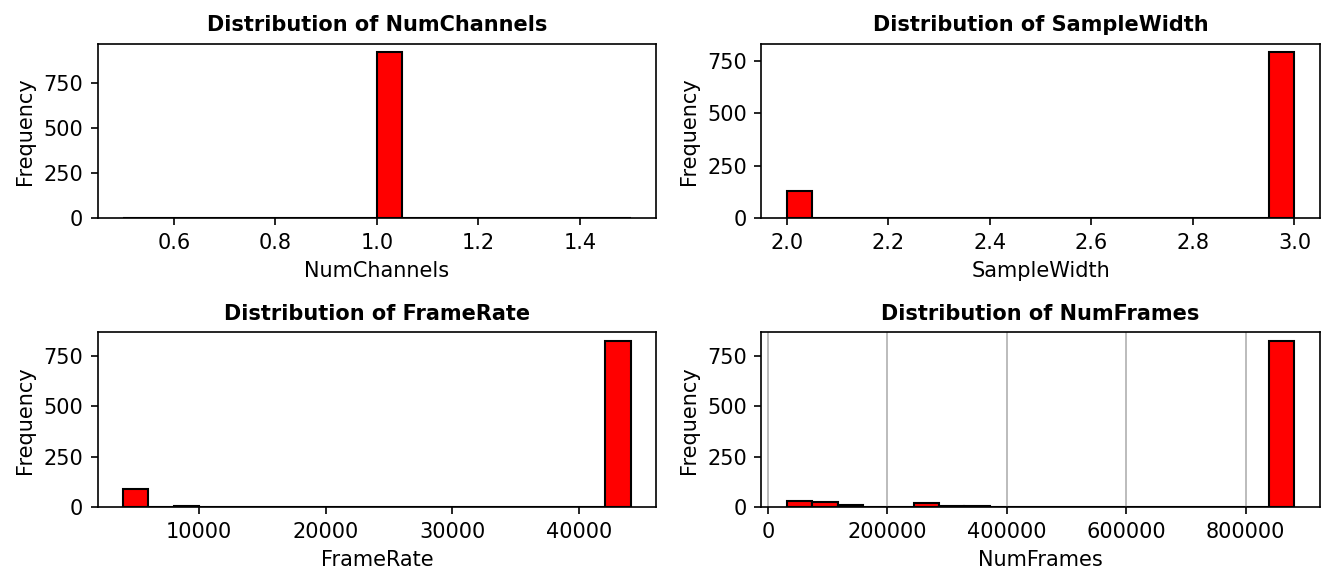

In [84]:
# Set up the figure and axes for a grid layout
fig, axs = plt.subplots(2, 2, figsize=(9, 4), dpi= 150)

# Plot histograms for numerical columns
columns = df_audio.columns[1:5]  # Select numerical columns
for i, column in enumerate(columns):
    ax = axs[i // 2, i % 2]  # Determine the position in the grid
    ax.hist(df_audio[column], bins=20, color='red', edgecolor='black')
    ax.set_title(f'Distribution of {column}', fontsize=10, weight='bold')
    ax.set_xlabel(column, fontsize=10)
    ax.set_ylabel('Frequency', fontsize=10)

plt.grid(axis='x')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

## 🎤 **Listening to a Random Audio File**

In this step, we will randomly select an audio file from our dataset and listen to it. This helps us get a sense of the audio data and verify the quality and content of the recordings. The process involves:

1. **Selecting a Random File**: We choose a file at random from the list of available `.wav` audio files in our dataset.
2. **Playing the Audio**: We use IPython's `Audio` class to play the selected audio file directly within the notebook.

By listening to the audio, we can ensure that the recordings are appropriate and examine their quality and content.


In [103]:
# Get a list of all audio files
audio_files = glob.glob('/content/respiratory_sound_database/Respiratory_Sound_Database/audio_and_txt_files/*.wav')

# Choose a random file
random_audio = random.choice(audio_files)

# Display the audio
ipd.Audio(random_audio)

Output hidden; open in https://colab.research.google.com to view.

## 👀 **Visualizing the Audio Waveform**

To gain insight into the structure and characteristics of our audio recordings, we plot the waveform of a randomly selected audio file. This visualization provides a clear view of the audio signal's amplitude over time. Here's a step-by-step breakdown:

1. **Load the Audio File**: We use `librosa` to load the audio data from the chosen `.wav` file. This library allows us to extract the audio signal and its sample rate.
2. **Plot the Waveform**: Using `matplotlib` and `librosa`, we create a waveform plot. This plot shows how the amplitude of the audio signal varies over time.

The waveform plot helps us understand the audio signal's dynamics and can reveal important characteristics such as silence periods and signal variations.


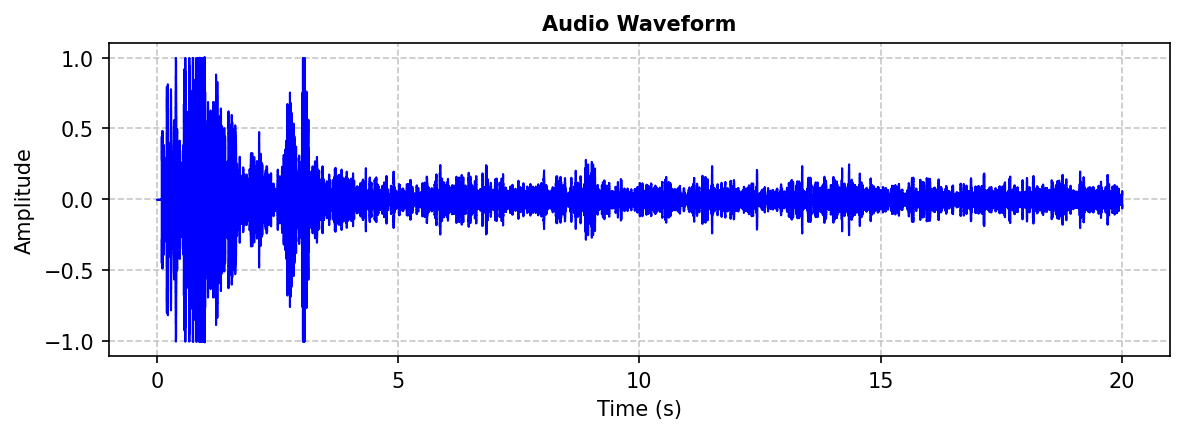

In [106]:
# Load the audio file
audio_data, sample_rate = librosa.load(random_audio)

# Create a figure with specific size
plt.figure(figsize=(8, 3), dpi= 150)

# Plot the waveform with a color and grid
librosa.display.waveshow(audio_data, sr=sample_rate, color='blue', zorder=3)
plt.title('Audio Waveform', fontsize=10, fontweight='bold')
plt.xlabel('Time (s)', fontsize=10)
plt.ylabel('Amplitude', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7, zorder=0)

# Display the plot
plt.tight_layout()
plt.show()


## 🔲**Visualizing a Shortened Audio Segment**

In this section, we focus on a segment of the audio file to observe its waveform in detail. We cut the audio to a duration of 0.15 seconds and plot the waveform for this segment. This helps us analyze shorter audio clips more closely.

### **Steps**:

1. **Cut the Audio**: We trim the audio data to the first 0.15 seconds.
2. **Plot the Waveform**: We visualize the waveform of this shortened audio segment.

The waveform plot for the short segment allows us to inspect the signal's characteristics more closely within this brief time frame.


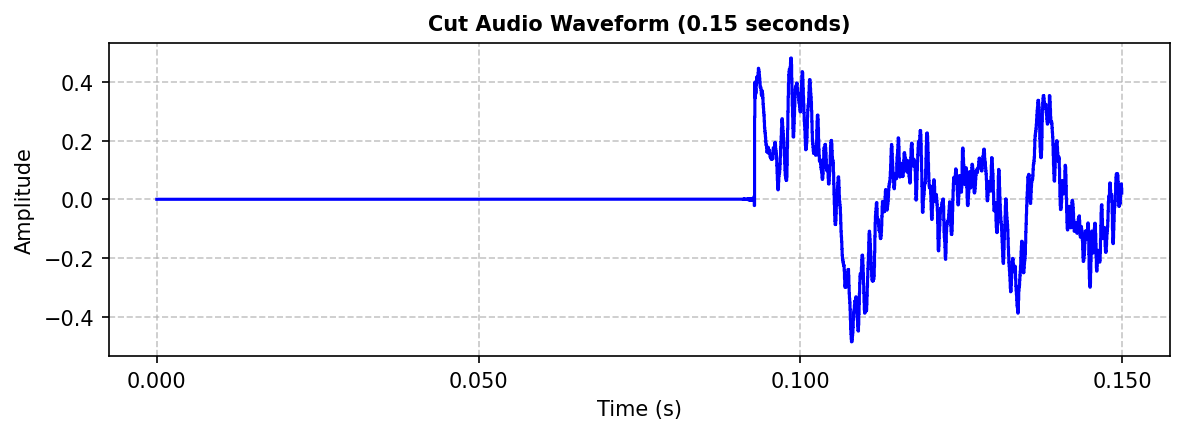

In [105]:
# Load the audio file
audio_data, sample_rate = librosa.load(random_audio)

# Cut the audio to 0.15 seconds
cutoff_time = 0.15
cutoff_samples = int(cutoff_time * sample_rate)
audio_data_cut = audio_data[:cutoff_samples]

# Create a figure with specific size
plt.figure(figsize=(8, 3), dpi= 150)

# Plot the waveform of the cut audio with a color and grid
librosa.display.waveshow(audio_data_cut, sr=sample_rate, color='blue', zorder=3)
plt.title('Cut Audio Waveform (0.15 seconds)', fontsize=10, fontweight='bold')
plt.xlabel('Time (s)', fontsize=10)
plt.ylabel('Amplitude', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7, zorder=0)

# Display the plot
plt.tight_layout()
plt.show()

In [104]:
# Assuming 'random_audio' is the path to the random audio file
# Extract the filename without extension
filename_without_extension = random_audio.split('/')[-1][:-4]

# Construct the path to the corresponding .txt file
txt_file = f'/content/respiratory_sound_database/Respiratory_Sound_Database/audio_and_txt_files/{filename_without_extension}.txt'

# Print the contents of the .txt file
with open(txt_file, 'r') as f:
  print(f.read())

3.464	5.868	0	0
5.868	8.473	1	1
8.473	11.027	1	1
11.027	13.898	0	1
13.898	17.186	1	0
17.186	19.959	0	0



### 🕒 **Time Intervals of Respiratory Sounds**

In this plot, we visualize the time intervals for specific respiratory sounds—**crackles** and **wheezes**—within an audio recording. This helps us understand when these sounds occur during the audio sample.

#### 🛠️ **Process:**

1. **Extract and Prepare Data**:
   - **Filename Extraction**: We extract the filename from the randomly chosen audio file path.
   - **Annotation Path**: Construct the path to the corresponding `.txt` file, which contains the annotations for the audio.

2. **Read Annotations**:
   - **Annotation File**: The `.txt` file is read to extract start and end times, and indicators for crackles and wheezes.

3. **Plotting**:
   - **Horizontal Bar Plot**: We use a horizontal bar plot to represent the time intervals of these sounds.
     - **Crackles**: Shown in red 🔴, indicating the duration of crackles.
     - **Wheezes**: Shown in blue 🔵, indicating the duration of wheezes.

#### 📈 **Plot Details**:
   - **X-Axis**: Represents time in seconds.
   - **Y-Axis**: The y-axis is removed to focus solely on the time intervals.

#### 🎨 **Plot Appearance**:
   - **Crackles** are displayed in red, and **Wheezes** in blue.
   - The plot includes a legend to differentiate between the two types of sounds.


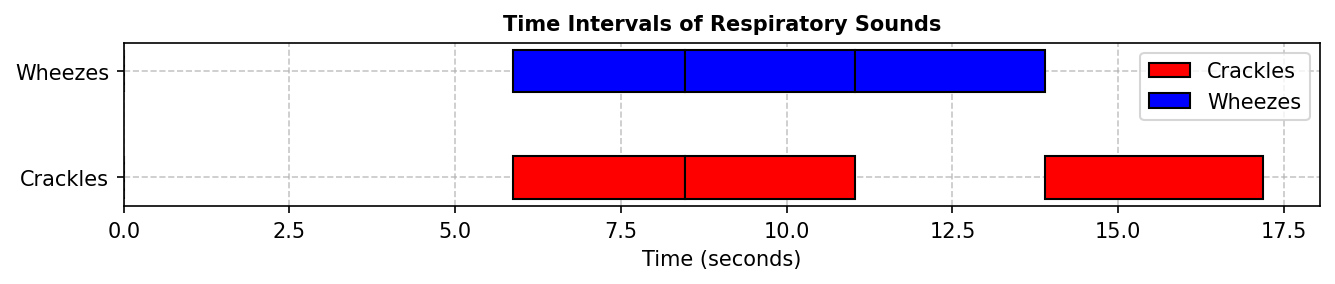

In [114]:
import matplotlib.pyplot as plt

# Assuming 'annotations' has been properly loaded from the text file
annotations = []
with open(txt_file, 'r') as f:
    for line in f:
        start, end, crackles, wheezes = line.strip().split('\t')
        annotations.append({
            'start': float(start),
            'end': float(end),
            'crackles': int(crackles),
            'wheezes': int(wheezes)
        })

# Create a grid layout with one row and one column for the plot
fig, ax = plt.subplots(figsize=(9, 2), dpi=150)  # Adjust figure size as needed

# Initialize variables for crackles and wheezes intervals
crackles_intervals = []
wheezes_intervals = []

# Iterate through annotations and determine intervals
for annotation in annotations:
    if annotation['crackles'] == 1:
        crackles_intervals.append((annotation['start'], annotation['end']))
    if annotation['wheezes'] == 1:
        wheezes_intervals.append((annotation['start'], annotation['end']))

# Plot the crackles intervals with a single legend entry
for start, end in crackles_intervals:
    ax.barh(0, end - start, left=start, height=0.4, color='red', edgecolor='black', zorder=3)
ax.barh(0, 0, left=0, height=0.4, color='red', edgecolor='black', label='Crackles')  # Dummy bar for legend

# Plot the wheezes intervals with a single legend entry
for start, end in wheezes_intervals:
    ax.barh(1, end - start, left=start, height=0.4, color='blue', edgecolor='black',zorder=3)
ax.barh(1, 0, left=0, height=0.4, color='blue', edgecolor='black', label='Wheezes')  # Dummy bar for legend

# Set labels and title
ax.set_xlabel('Time (seconds)', fontsize=10)
ax.set_yticks([0, 1])
ax.set_yticklabels(['Crackles', 'Wheezes'], fontsize=10)
ax.set_title('Time Intervals of Respiratory Sounds', fontsize=10, weight='bold')
ax.legend(loc='upper right')

# Add gridlines for better readability
ax.grid(True, linestyle='--', alpha=0.7, zorder=0)

# Adjust layout
plt.tight_layout()
plt.show()

In [120]:
# Extract patient number from 'Filename' in df_audio
df_audio['Patient number'] = df_audio['Filename'].str.split('/').str[-1].str.split('_').str[0].astype(int)

# Merge the two dataframes on 'Patient number'
merged_df = pd.merge(df_audio, df, on='Patient number', how='left')

# Select relevant columns and rename for clarity
merged_df = merged_df[['Filename', 'Diagnosis']]
csv_filename = 'audio_diagnosis.csv'
# Save the merged DataFrame to a CSV file
merged_df.to_csv('audio_diagnosis.csv', index=False)
print("CSV file 'audio_diagnosis.csv' created successfully.")
# Download the file
files.download(csv_filename)
merged_df

CSV file 'audio_diagnosis.csv' created successfully.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Filename,Diagnosis
0,/content/respiratory_sound_database/Respirator...,COPD
1,/content/respiratory_sound_database/Respirator...,Pneumonia
2,/content/respiratory_sound_database/Respirator...,COPD
3,/content/respiratory_sound_database/Respirator...,COPD
4,/content/respiratory_sound_database/Respirator...,Bronchiectasis
...,...,...
915,/content/respiratory_sound_database/Respirator...,URTI
916,/content/respiratory_sound_database/Respirator...,COPD
917,/content/respiratory_sound_database/Respirator...,COPD
918,/content/respiratory_sound_database/Respirator...,COPD


In [157]:
# Calculate the spectral centroid of the audio signal
# The spectral centroid indicates where the center of mass of the spectrum is located.
# It is often associated with the perceived brightness of a sound.
spectral_centroid = feature.spectral_centroid(y=audio_data, sr=sample_rate)
# Calculate the spectral bandwidth of the audio signal
# The spectral bandwidth measures the width of the spectrum.
# It is defined as the difference between the 75th and 25th percentile of the power spectrum.
spectral_bandwidth = feature.spectral_bandwidth(y=audio_data, sr=sample_rate)

# Calculate the spectral flatness of the audio signal
# Spectral flatness is a measure that indicates how flat the spectrum is.
# A high spectral flatness value indicates a noise-like sound, whereas a lower value indicates a more tonal sound.
spectral_flatness = feature.spectral_flatness(y=audio_data)

print(f'Spectral Centroid: {spectral_centroid.mean()}')
print(f'Spectral Bandwidth: {spectral_bandwidth.mean()}')
print(f'Spectral Flatness: {spectral_flatness.mean()}')

Spectral Centroid: 207.77681168497023
Spectral Bandwidth: 936.7855672184057
Spectral Flatness: 1.0126007509825286e-05



### 📊 Visualizing Waveforms of 9 Different Patients

In this section, we will select 9 unique audio files based on patient numbers and visualize their waveforms. Each audio file corresponds to a different patient, and we will plot the waveforms for these selected files.

#### 🧑‍⚕️ **Steps:**
1. **Extract Patient Numbers**: Extract patient numbers from the filenames.
2. **Select 9 Unique Patients**: Choose 9 unique patient numbers.
3. **Plot Waveforms**: Plot the waveform of the audio files for the selected patients.

🧩 **Why This Is Important**: This section explains the significance of the visualization in the context of analyzing and understanding the audio data. It highlights how comparing waveforms helps in identifying variations, patterns, and features relevant to the study.


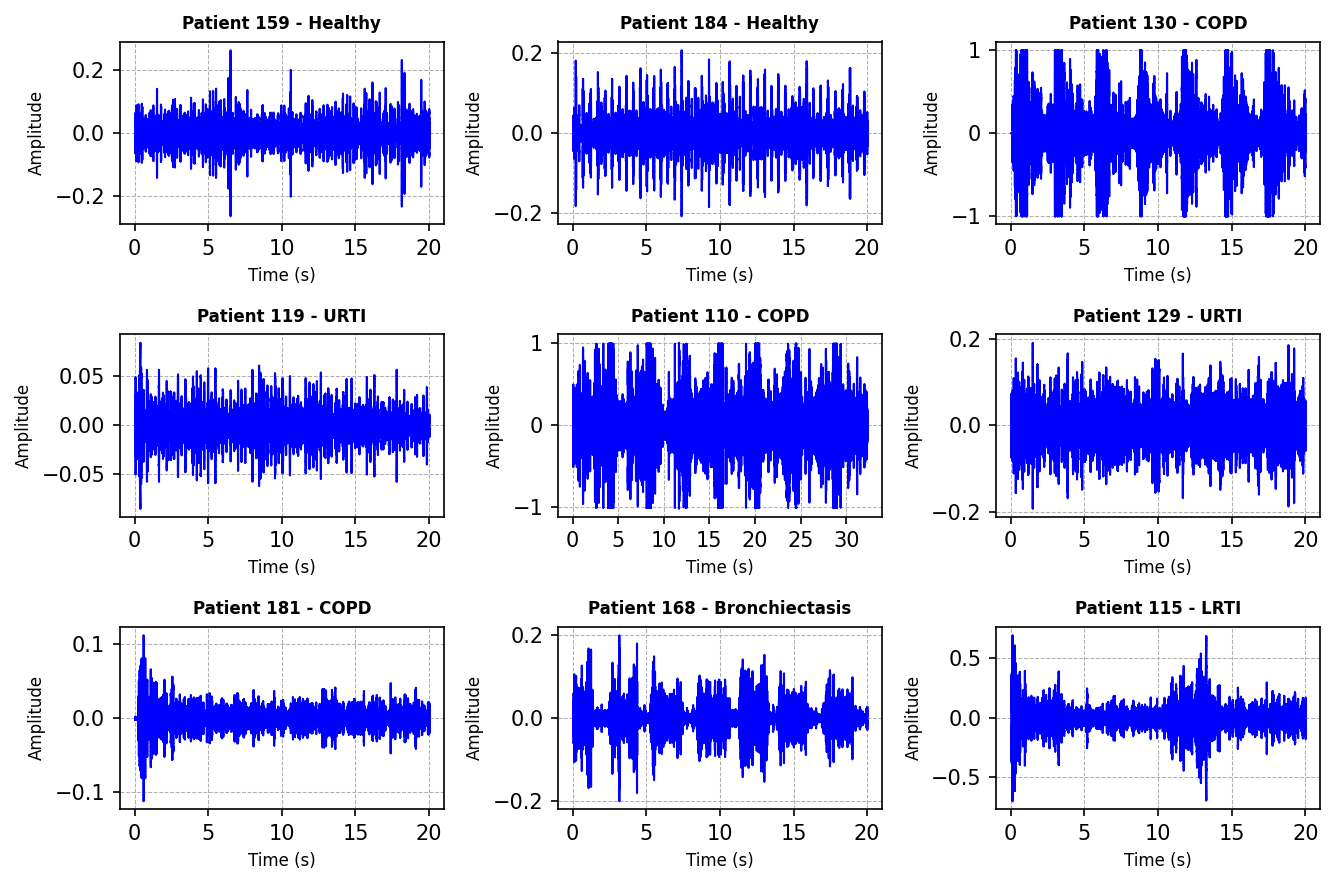

In [127]:
import matplotlib.pyplot as plt
import librosa
import librosa.display
import random

# Extract patient numbers from filenames and select 9 unique ones
patient_numbers = merged_df['Filename'].apply(lambda x: int(x.split('/')[-1][:3])).unique()
selected_patients = random.sample(list(patient_numbers), 9)

# Set up the figure and axes
plt.figure(figsize=(9, 6), dpi=150)
for i, patient in enumerate(selected_patients):
    # Filter DataFrame for the current patient
    patient_df = merged_df[merged_df['Filename'].str.contains(str(patient))]

    # Select a random audio file for the current patient
    random_audio = random.choice(patient_df['Filename'].tolist())

    # Load the audio file
    audio_data, sample_rate = librosa.load(random_audio)

    # Extract diagnosis information
    diagnosis = patient_df['Diagnosis'].iloc[0]  # Assuming Diagnosis is consistent across entries for the same patient

    # Plot the waveform
    plt.subplot(3, 3, i + 1)
    librosa.display.waveshow(audio_data, sr=sample_rate, color='b',zorder=3)
    plt.title(f'Patient {patient} - {diagnosis}', fontsize=8, fontweight='bold')
    plt.xlabel('Time (s)', fontsize=8)
    plt.ylabel('Amplitude', fontsize=8)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5, zorder=0)

# Adjust the layout to ensure everything fits well
plt.tight_layout()

# Display the plot
plt.show()


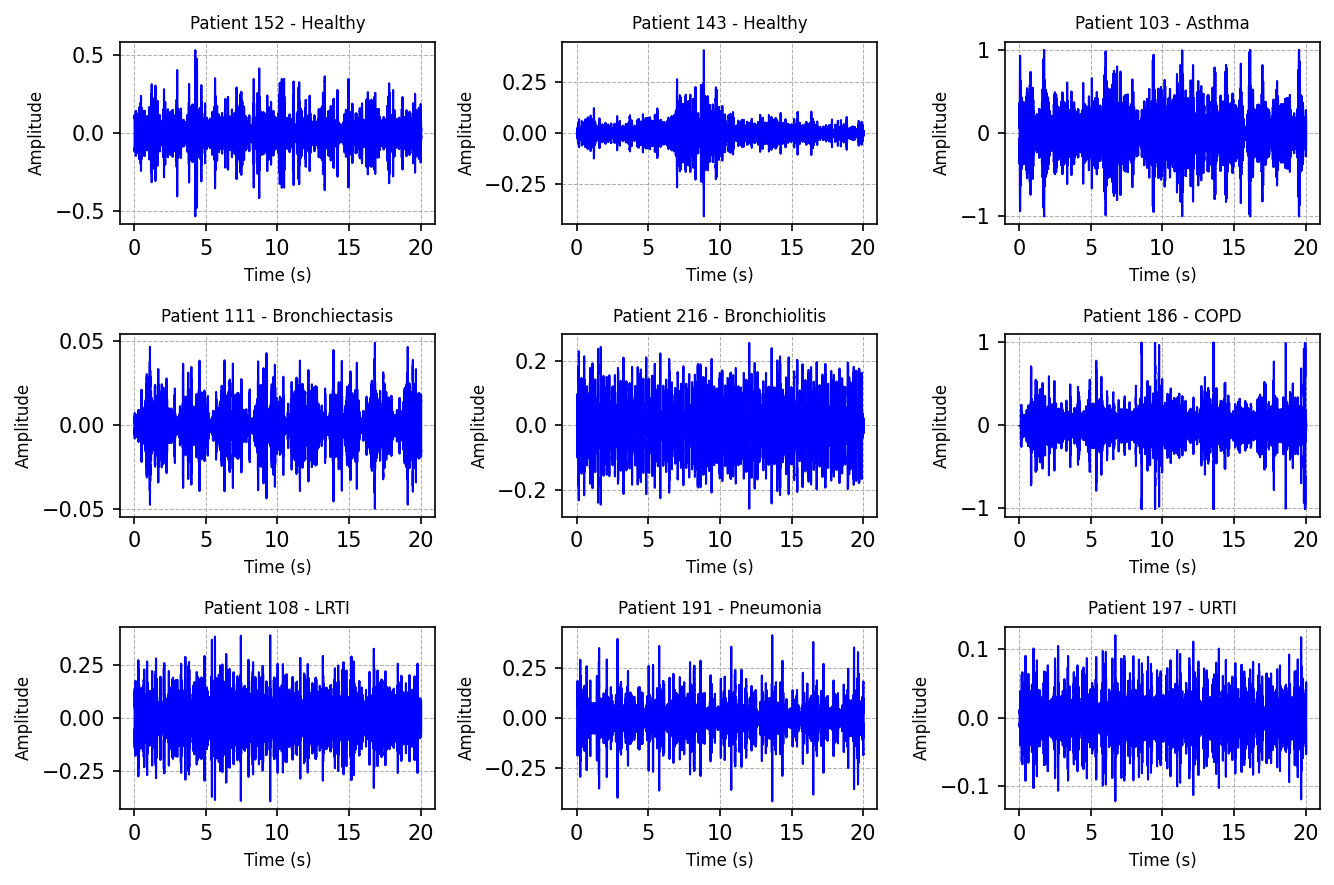

[152, 143, 103, 111, 216, 186, 108, 191, 197]


In [133]:
# Group the DataFrame by 'Diagnosis'
grouped_df = merged_df.groupby('Diagnosis')

# Initialize a list to store selected patients
selected_patients = []

# Select two healthy patients
healthy_group = grouped_df.get_group('Healthy')
selected_patients.extend(random.sample(healthy_group['Filename'].apply(lambda x: int(x.split('/')[-1][:3])).tolist(), 2))

# Select one patient from each other diagnosis group
for diagnosis, group in grouped_df:
  if diagnosis != 'Healthy':
    # Randomly select a patient from the group
    patient = random.choice(group['Filename'].apply(lambda x: int(x.split('/')[-1][:3])).tolist())
    selected_patients.append(patient)

# Plot waveforms for selected patients
plt.figure(figsize=(9, 6), dpi=150)
for i, patient in enumerate(selected_patients):
  # Filter DataFrame for the current patient
  patient_df = merged_df[merged_df['Filename'].str.contains(str(patient))]

  # Select a random audio file for the current patient
  random_audio = random.choice(patient_df['Filename'].tolist())

  # Get the diagnosis for the current patient
  diagnosis = patient_df['Diagnosis'].iloc[0]

  # Load the audio file
  audio_data, sample_rate = librosa.load(random_audio)

  # Plot the waveform
  plt.subplot(3, 3, i+1)
  librosa.display.waveshow(audio_data, sr=sample_rate, color='b',zorder=3)
  plt.title(f'Patient {patient} - {diagnosis}', fontsize=8)  # Add diagnosis to title
  plt.xlabel('Time (s)', fontsize=8)
  plt.ylabel('Amplitude', fontsize=8)
  plt.grid(True, which='both', linestyle='--', linewidth=0.5, zorder=0)
plt.tight_layout()
plt.show()
print(selected_patients)

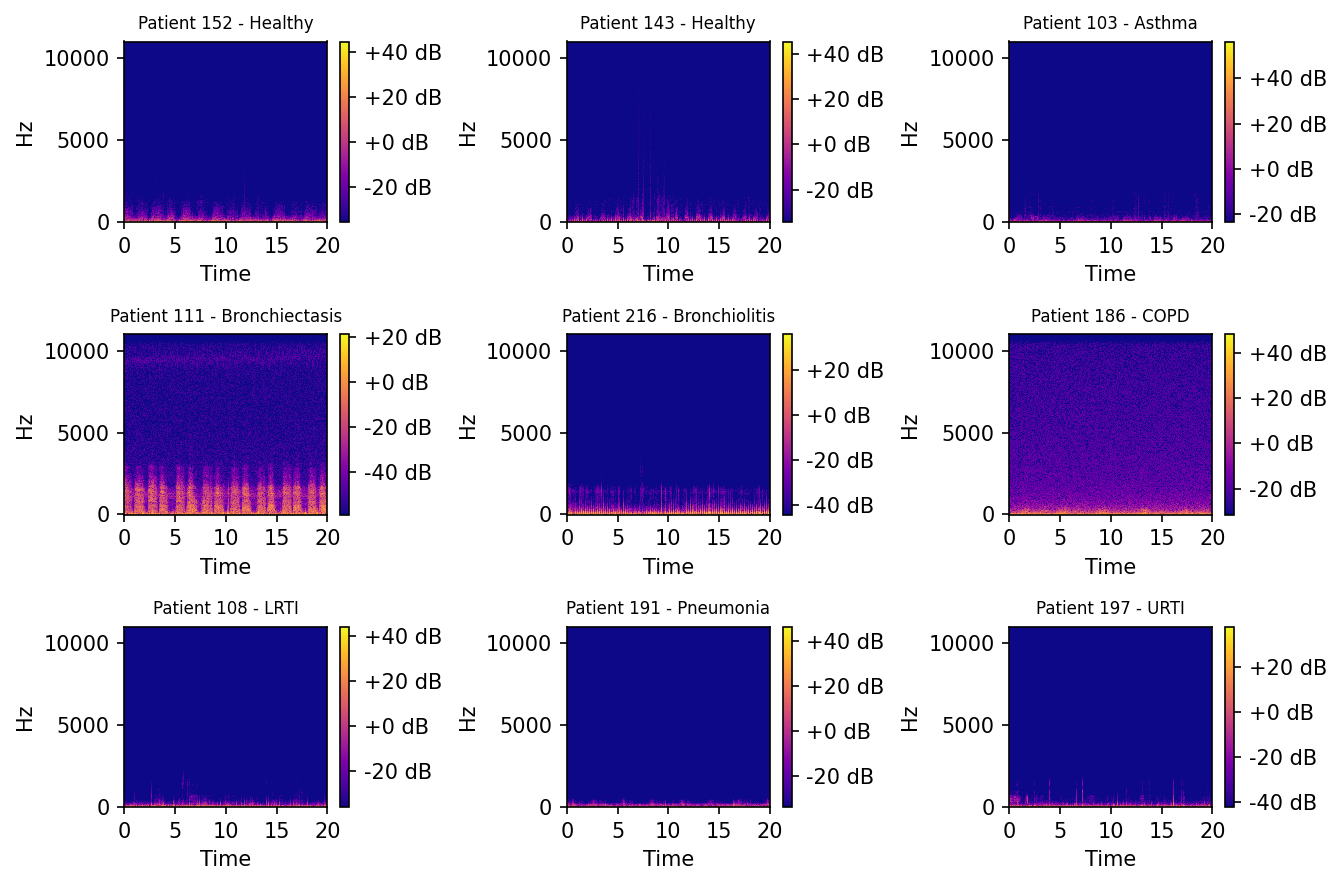

In [144]:
# Use the same selected patients from the previous cell
selected_patients = [152, 143, 103, 111, 216, 186, 108, 191, 197]

# Plot spectrograms for selected patients
plt.figure(figsize=(9, 6), dpi=150)
for i, patient in enumerate(selected_patients):
  # Filter DataFrame for the current patient
  patient_df = merged_df[merged_df['Filename'].str.contains(str(patient))]

  # Select a random audio file for the current patient
  random_audio = random.choice(patient_df['Filename'].tolist())

  # Get the diagnosis for the current patient
  diagnosis = patient_df['Diagnosis'].iloc[0]

  # Load the audio file
  audio_data, sample_rate = librosa.load(random_audio)

  # Compute the spectrogram
  stft = librosa.stft(audio_data)
  stft_db = librosa.amplitude_to_db(abs(stft))

  # Plot the spectrogram with a consistent colormap
  plt.subplot(3, 3, i+1)
  librosa.display.specshow(stft_db, sr=sample_rate, x_axis='time', y_axis='hz', cmap='plasma')  # Use 'plasma' or any other consistent colormap
  plt.colorbar(format='%+2.0f dB')
  plt.title(f'Patient {patient} - {diagnosis}', fontsize=8)  # Add diagnosis to title

plt.tight_layout()
plt.show()



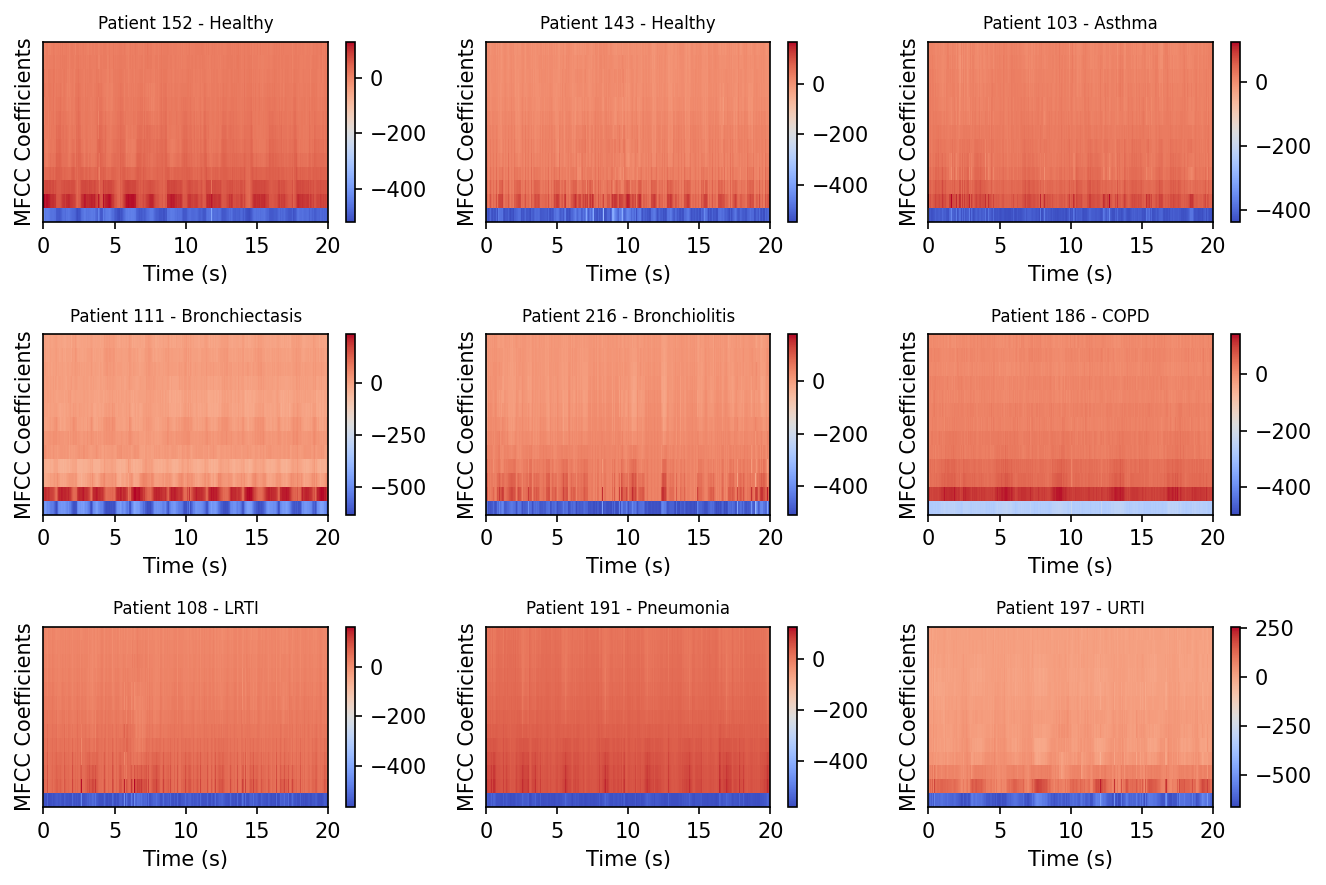

In [143]:
# Use the same selected patients from the previous cell
selected_patients = [152, 143, 103, 111, 216, 186, 108, 191, 197]

# Plot MFCCs for selected patients
plt.figure(figsize=(9, 6), dpi=150)
for i, patient in enumerate(selected_patients):
  # Filter DataFrame for the current patient
  patient_df = merged_df[merged_df['Filename'].str.contains(str(patient))]

  # Select a random audio file for the current patient
  random_audio = random.choice(patient_df['Filename'].tolist())

  # Get the diagnosis for the current patient
  diagnosis = patient_df['Diagnosis'].iloc[0]

  # Load the audio file
  audio_data, sample_rate = librosa.load(random_audio)

  # Extract MFCCs
  mfccs = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=13)

  # Plot the MFCCs
  plt.subplot(3, 3, i+1)
  librosa.display.specshow(mfccs, sr=sample_rate, x_axis='time')
  plt.colorbar()
  plt.title(f'Patient {patient} - {diagnosis}', fontsize=8)  # Add diagnosis to title
  plt.xlabel('Time (s)')
  plt.ylabel('MFCC Coefficients')

plt.tight_layout()
plt.show()


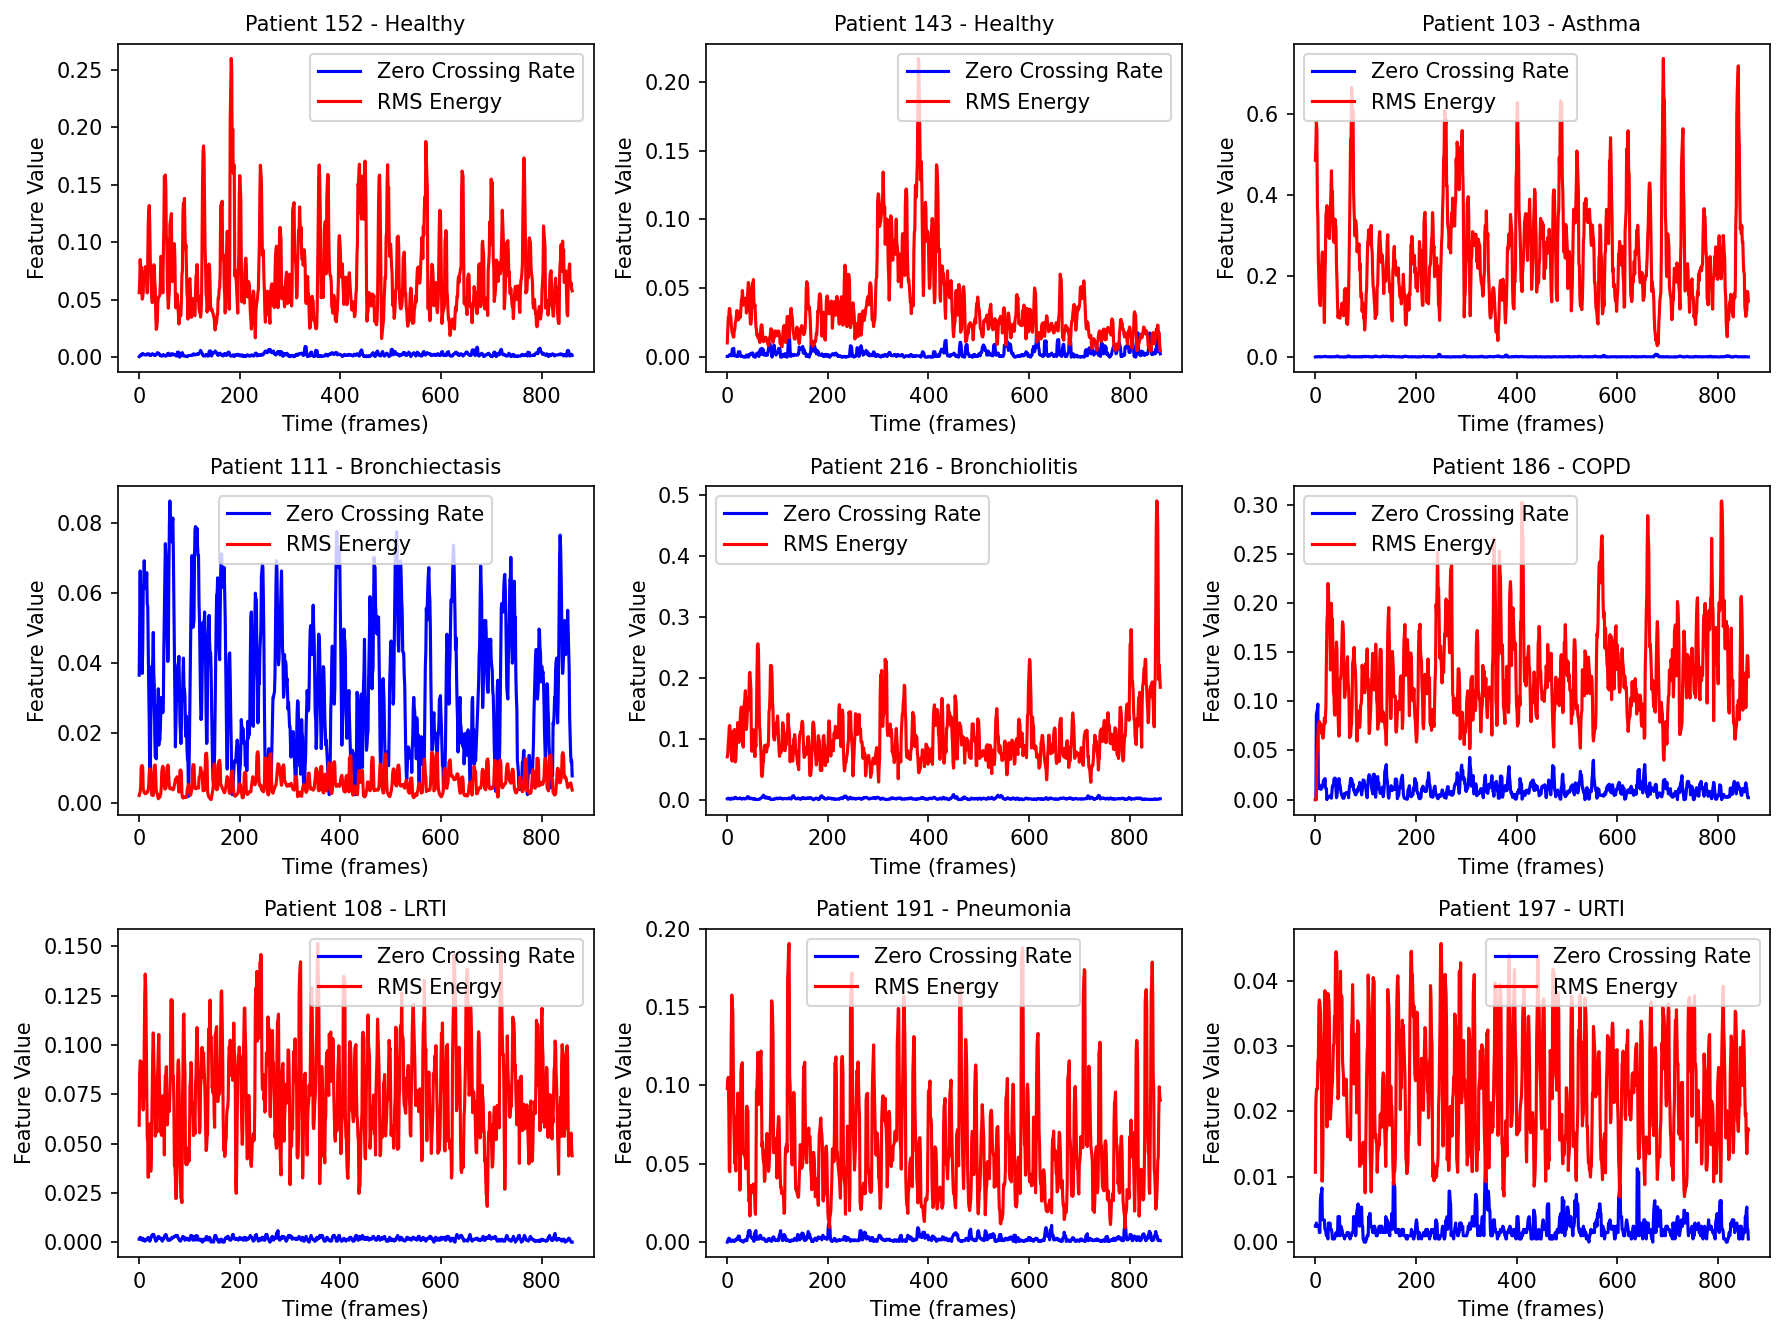

In [151]:
# Use the same selected patients from the previous cell
selected_patients = [152, 143, 103, 111, 216, 186, 108, 191, 197]

# Plot time-domain features for selected patients
plt.figure(figsize=(12, 9), dpi=150)
for i, patient in enumerate(selected_patients):
  # Filter DataFrame for the current patient
  patient_df = merged_df[merged_df['Filename'].str.contains(str(patient))]

  # Select a random audio file for the current patient
  random_audio = random.choice(patient_df['Filename'].tolist())

  # Get the diagnosis for the current patient
  diagnosis = patient_df['Diagnosis'].iloc[0]

  # Load the audio file
  audio_data, sample_rate = librosa.load(random_audio)

  # Extract time-domain features
  zero_crossing_rate = librosa.feature.zero_crossing_rate(audio_data)
  rms = librosa.feature.rms(y=audio_data)

  # Plot the time-domain features
  plt.subplot(3, 3, i+1)
  plt.plot(zero_crossing_rate[0], label='Zero Crossing Rate', color='b')
  plt.plot(rms[0], label='RMS Energy', color='red')
  plt.title(f'Patient {patient} - {diagnosis}', fontsize=10)  # Add diagnosis to title
  plt.xlabel('Time (frames)')
  plt.ylabel('Feature Value')
  plt.legend()

plt.tight_layout()
plt.show()
